### boxplot for the clustering 

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# load the data CSV file 

df_2GMM=pd.read_csv('/rds/general/user/hg1222/home/Group5/Clustering_temp/Train 2GMM.csv', header=0, index_col=0)

In [5]:
df_5Kmeans=pd.read_csv('/rds/general/user/hg1222/home/Group5/Clustering_temp/Train 5Kmeans.csv', header=0, index_col=0)

In [6]:
print(df_2GMM)

                      Monocyte_count.0.0  Reti_count.0.0  WBC_count.0.0  \
Lymphocyte_count.0.0                                                      
 0.113554                       0.001141        0.314987       0.212246   
 1.416143                      -0.100397       -0.514203       1.424125   
-0.084666                      -0.100397        0.149149      -0.301262   
 0.396725                       0.102678        0.220222       1.095480   
 1.359509                       0.051910       -0.490512       1.105750   
...                                  ...             ...            ...   
-0.214925                      -0.120704       -0.229910      -0.658663   
 0.215496                      -0.029320       -0.514203       0.150625   
 0.028602                       0.183909        0.480825      -0.023967   
-0.554731                      -0.425317       -0.632659      -0.225262   
-0.064844                      -0.141012       -0.135145      -0.317694   

                      RB

In [7]:
import seaborn as sns

In [8]:
print(df_2GMM.info())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 15744 entries, 0.113553874463486 to -0.0648441965971477
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Monocyte_count.0.0                 15744 non-null  float64
 1   Reti_count.0.0                     15744 non-null  float64
 2   WBC_count.0.0                      15744 non-null  float64
 3   RBC_count.0.0                      15744 non-null  float64
 4   Hgb_conc.0.0                       15744 non-null  float64
 5   Haematocrit_perc.0.0               15744 non-null  float64
 6   Platelet_count.0.0                 15744 non-null  float64
 7   Basophil_count.0.0                 15744 non-null  float64
 8   Eosinophil_count.0.0               15744 non-null  float64
 9   Neutrophil_count.0.0               15744 non-null  float64
 10  Immature_ret_fraction.0.0          15744 non-null  float64
 11  High_light_scatter_ret

In [9]:
df_2GMM = df_2GMM.astype(float)

In [10]:
# create melted dataframe for box plot
data_melted_2gmm=df_2GMM.melt(id_vars='cluster_ncomponents', var_name='column_name', value_name='value')

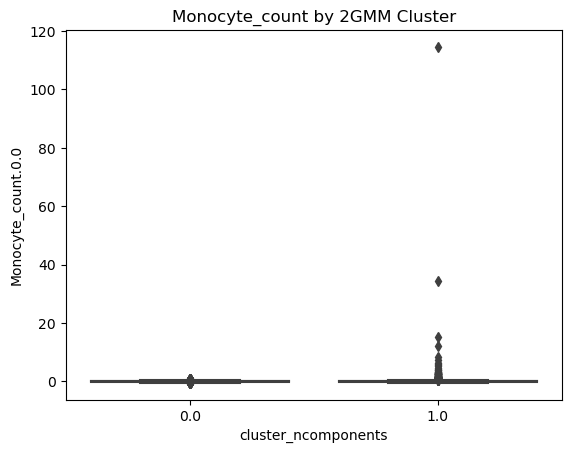

In [11]:
sns.boxplot(x='cluster_ncomponents', y='Monocyte_count.0.0', data=df_2GMM)
plt.title('Monocyte_count by 2GMM Cluster')
plt.show()

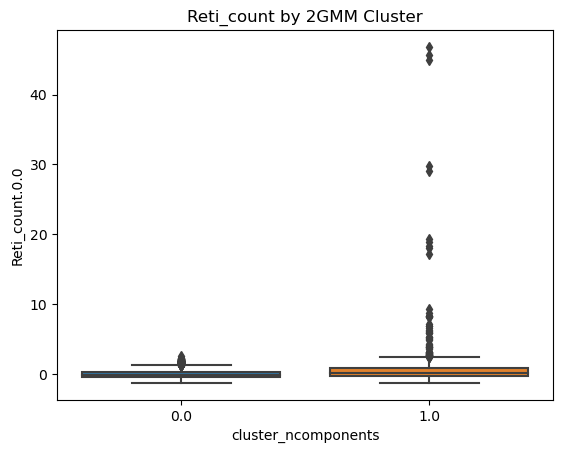

In [12]:
sns.boxplot(x='cluster_ncomponents', y='Reti_count.0.0', data=df_2GMM)
plt.title('Reti_count by 2GMM Cluster')
plt.show()

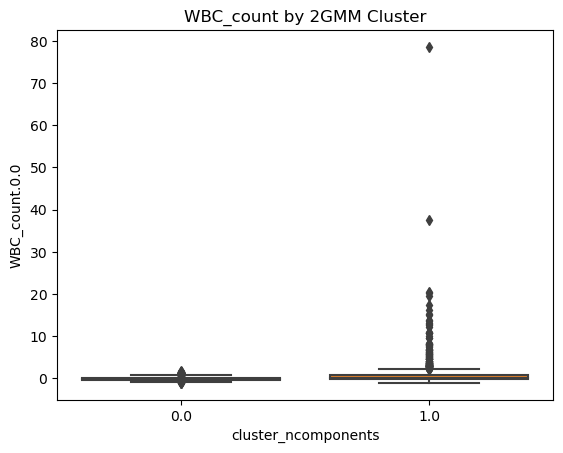

In [13]:
sns.boxplot(x='cluster_ncomponents', y='WBC_count.0.0', data=df_2GMM)
plt.title('WBC_count by 2GMM Cluster')
plt.show()

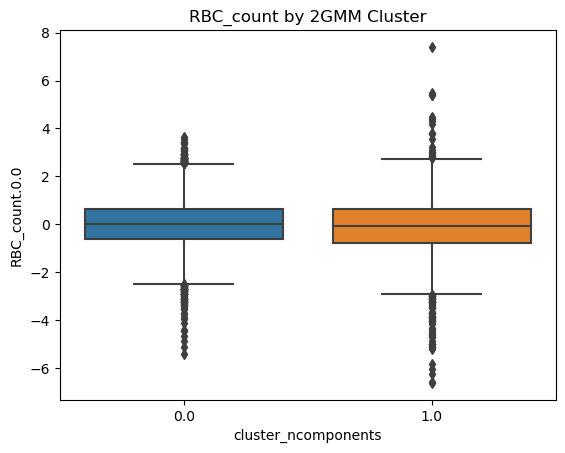

In [14]:
sns.boxplot(x='cluster_ncomponents', y='RBC_count.0.0', data=df_2GMM)
plt.title('RBC_count by 2GMM Cluster')
plt.show()

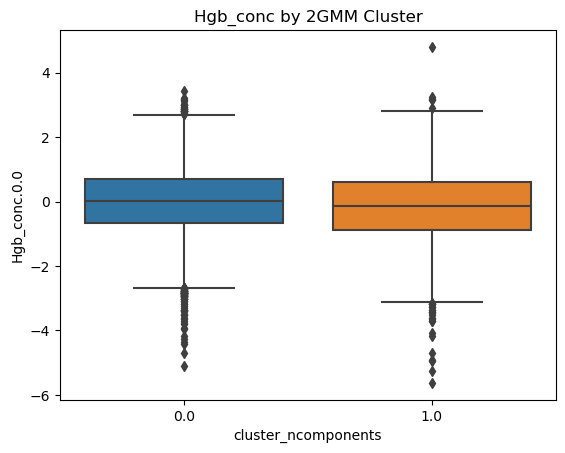

In [15]:
sns.boxplot(x='cluster_ncomponents', y='Hgb_conc.0.0', data=df_2GMM)
plt.title('Hgb_conc by 2GMM Cluster')
plt.show()

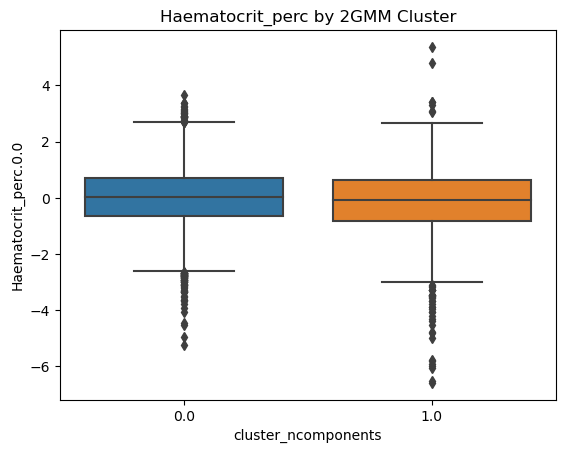

In [16]:
sns.boxplot(x='cluster_ncomponents', y='Haematocrit_perc.0.0', data=df_2GMM)
plt.title('Haematocrit_perc by 2GMM Cluster')
plt.show()

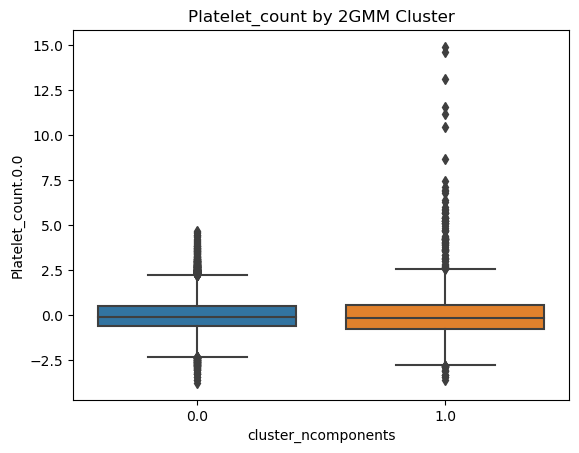

In [17]:
sns.boxplot(x='cluster_ncomponents', y='Platelet_count.0.0', data=df_2GMM)
plt.title('Platelet_count by 2GMM Cluster')
plt.show()

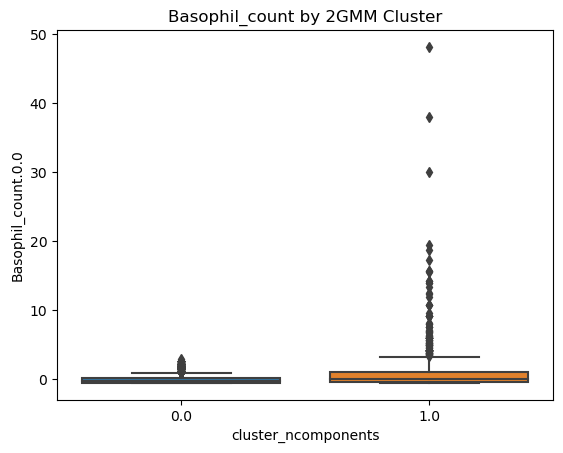

In [18]:
sns.boxplot(x='cluster_ncomponents', y='Basophil_count.0.0', data=df_2GMM)
plt.title('Basophil_count by 2GMM Cluster')
plt.show()

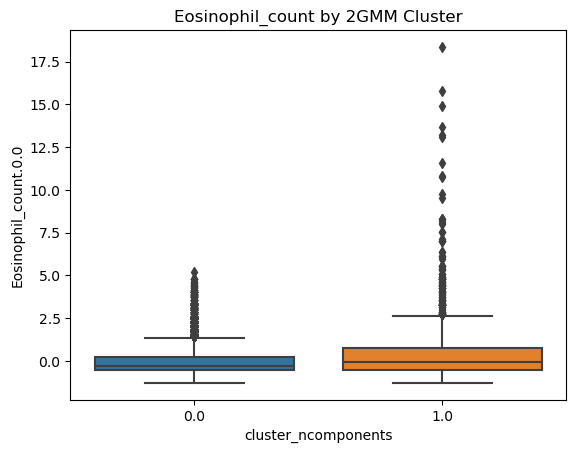

In [19]:
sns.boxplot(x='cluster_ncomponents', y='Eosinophil_count.0.0', data=df_2GMM)
plt.title('Eosinophil_count by 2GMM Cluster')
plt.show()

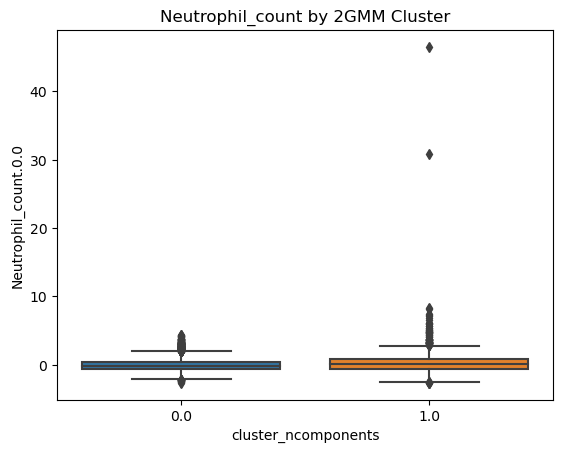

In [20]:
sns.boxplot(x='cluster_ncomponents', y='Neutrophil_count.0.0', data=df_2GMM)
plt.title('Neutrophil_count by 2GMM Cluster')
plt.show()

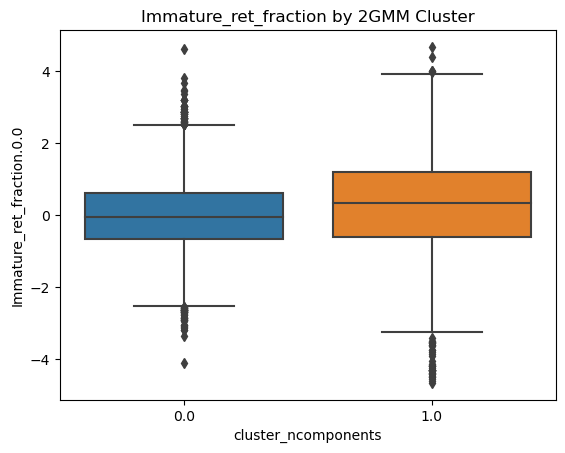

In [21]:
sns.boxplot(x='cluster_ncomponents', y='Immature_ret_fraction.0.0', data=df_2GMM)
plt.title('Immature_ret_fraction by 2GMM Cluster')
plt.show()

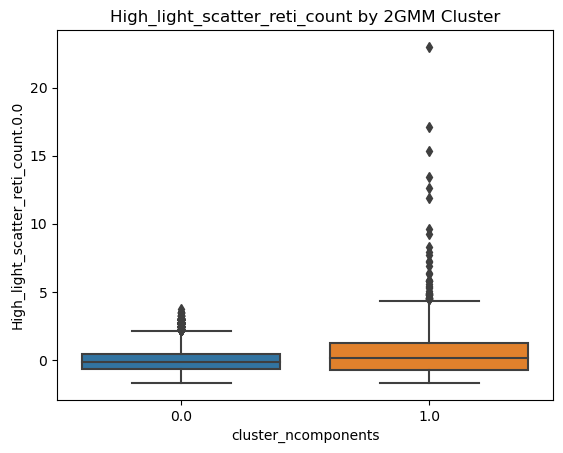

In [22]:
sns.boxplot(x='cluster_ncomponents', y='High_light_scatter_reti_count.0.0', data=df_2GMM)
plt.title('High_light_scatter_reti_count by 2GMM Cluster')
plt.show()

In [23]:
max_monocyte_count = df_5Kmeans['Monocyte_count.0.0'].max()
print("Maximum Monocyte count:", max_monocyte_count)


Maximum Monocyte count: 114.62691174241846


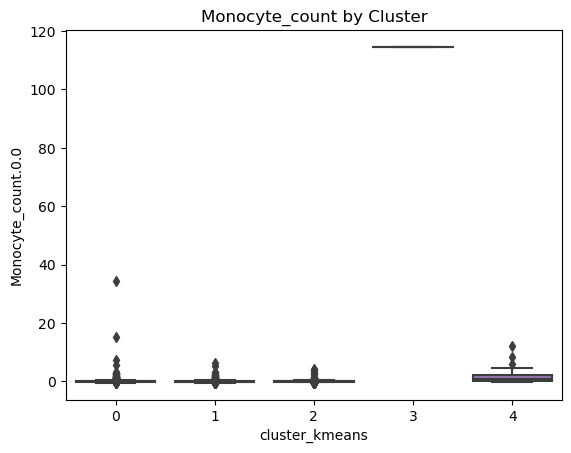

In [24]:
sns.boxplot(x='cluster_kmeans', y='Monocyte_count.0.0', data=df_5Kmeans)
plt.title('Monocyte_count by Cluster')
plt.show()

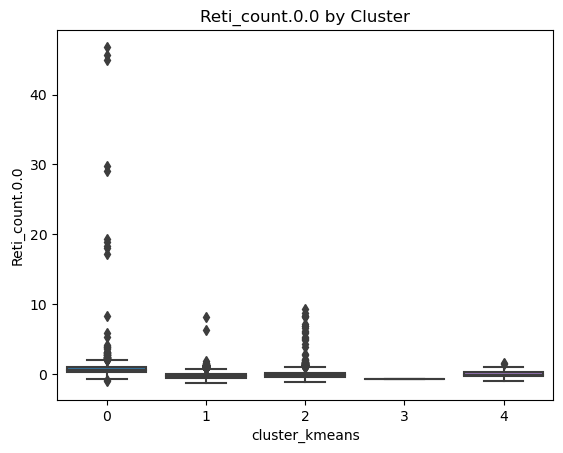

In [25]:
sns.boxplot(x='cluster_kmeans', y='Reti_count.0.0', data=df_5Kmeans)
plt.title('Reti_count.0.0 by Cluster')
plt.show()

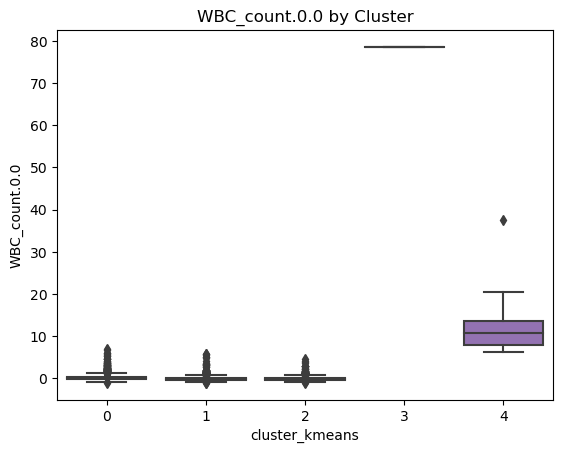

In [26]:
sns.boxplot(x='cluster_kmeans', y='WBC_count.0.0', data=df_5Kmeans)
plt.title('WBC_count.0.0 by Cluster')
plt.show()

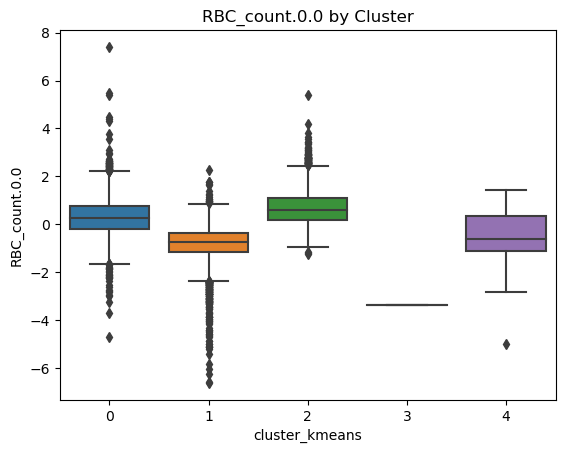

In [27]:
sns.boxplot(x='cluster_kmeans', y='RBC_count.0.0', data=df_5Kmeans)
plt.title('RBC_count.0.0 by Cluster')
plt.show()

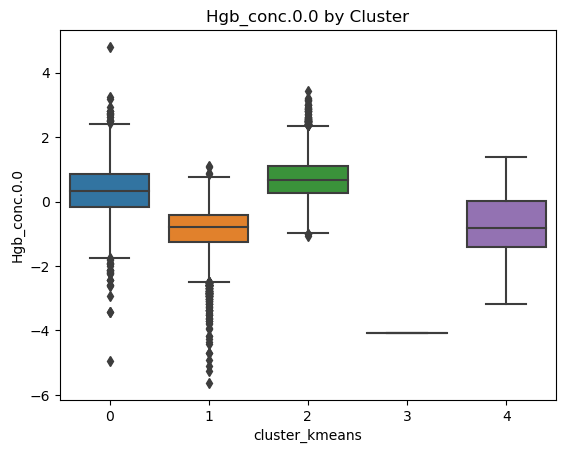

In [28]:
sns.boxplot(x='cluster_kmeans', y='Hgb_conc.0.0', data=df_5Kmeans)
plt.title('Hgb_conc.0.0 by Cluster')
plt.show()

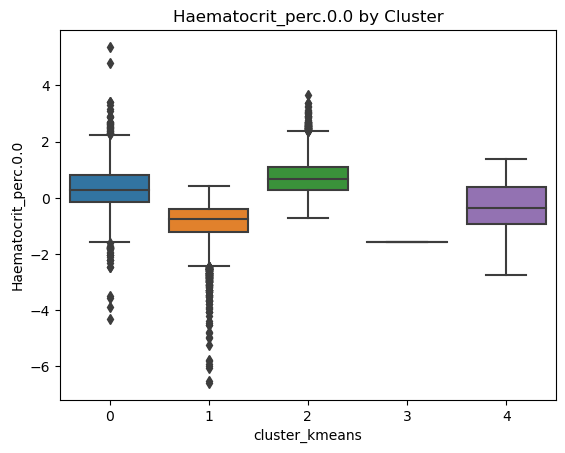

In [29]:
sns.boxplot(x='cluster_kmeans', y='Haematocrit_perc.0.0', data=df_5Kmeans)
plt.title('Haematocrit_perc.0.0 by Cluster')
plt.show()

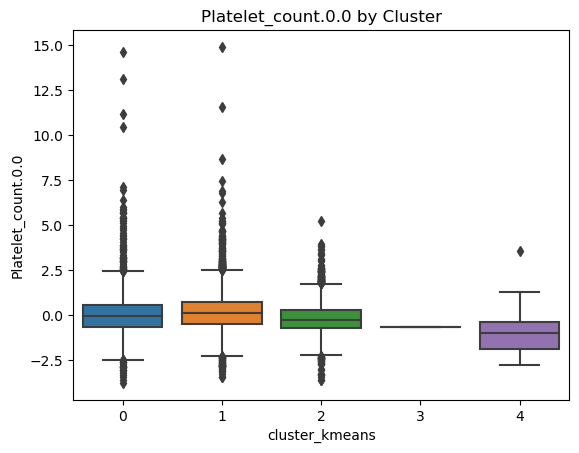

In [30]:
sns.boxplot(x='cluster_kmeans', y='Platelet_count.0.0', data=df_5Kmeans)
plt.title('Platelet_count.0.0 by Cluster')
plt.show()

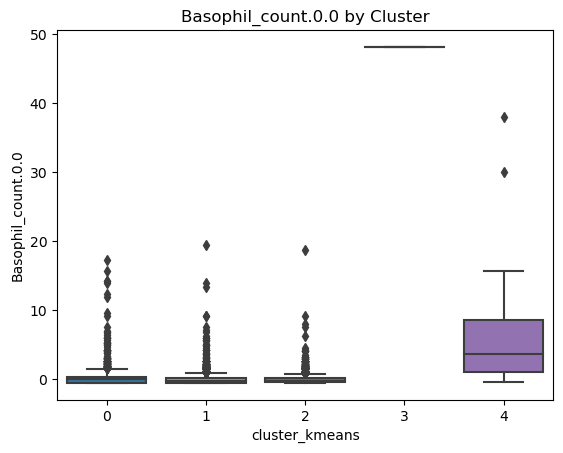

In [31]:
sns.boxplot(x='cluster_kmeans', y='Basophil_count.0.0', data=df_5Kmeans)
plt.title('Basophil_count.0.0 by Cluster')
plt.show()

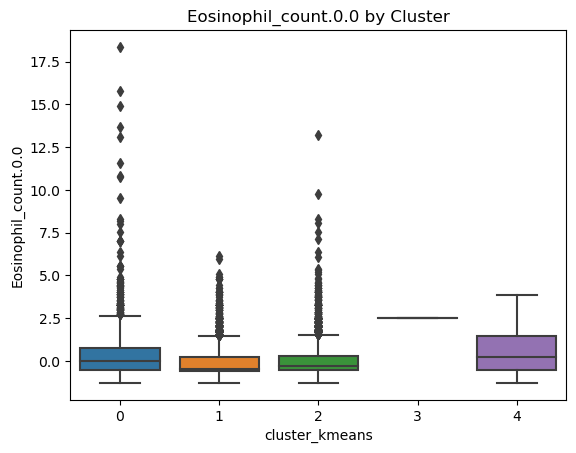

In [32]:
sns.boxplot(x='cluster_kmeans', y='Eosinophil_count.0.0', data=df_5Kmeans)
plt.title('Eosinophil_count.0.0 by Cluster')
plt.show()

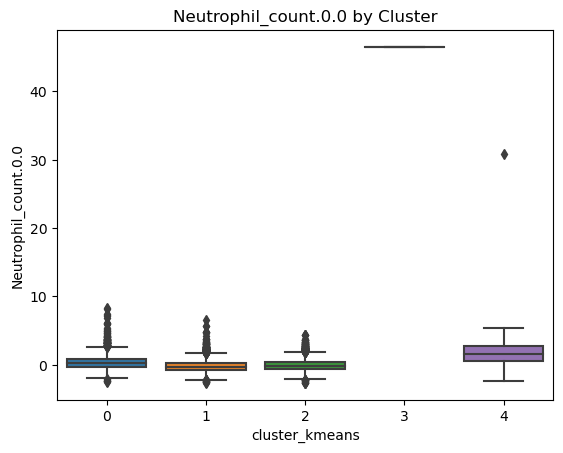

In [33]:
sns.boxplot(x='cluster_kmeans', y='Neutrophil_count.0.0', data=df_5Kmeans)
plt.title('Neutrophil_count.0.0 by Cluster')
plt.show()

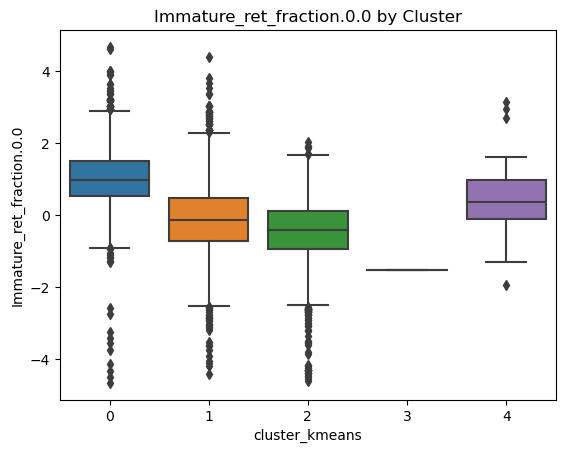

In [34]:
sns.boxplot(x='cluster_kmeans', y='Immature_ret_fraction.0.0', data=df_5Kmeans)
plt.title('Immature_ret_fraction.0.0 by Cluster')
plt.show()

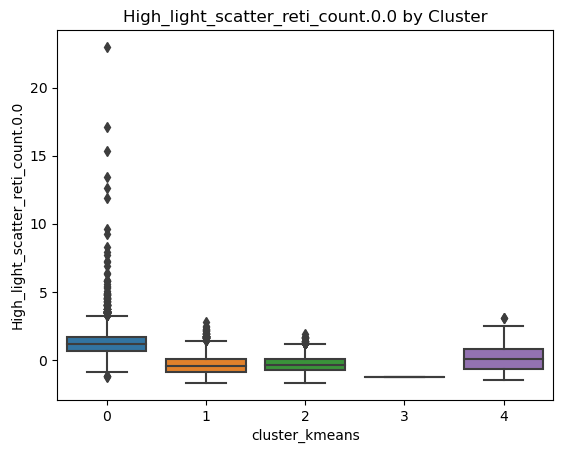

In [35]:
sns.boxplot(x='cluster_kmeans', y='High_light_scatter_reti_count.0.0', data=df_5Kmeans)
plt.title('High_light_scatter_reti_count.0.0 by Cluster')
plt.show()

In [36]:
sns.boxplot(x='cluster_kmeans', y='Lymphocyte_count.0.0', data=df_5Kmeans)
plt.title('Lymphocyte_count.0.0 by Cluster')
plt.show()

ValueError: Could not interpret input 'Lymphocyte_count.0.0'

In [37]:
print(df_5Kmeans)

                      Monocyte_count.0.0  Reti_count.0.0  WBC_count.0.0  \
Lymphocyte_count.0.0                                                      
 0.101115                       0.000724        0.380855       0.195336   
 1.352502                      -0.097026       -0.584809       1.362884   
-0.089314                      -0.097026        0.187722      -0.299388   
 0.373155                       0.098473        0.270493       1.046261   
 1.298094                       0.049599       -0.557218       1.056156   
...                                  ...             ...            ...   
-0.143722                      -0.009051        0.518807      -0.287514   
 0.073910                       0.196223       -0.308905       0.393226   
-0.143722                       0.000724       -0.419266       0.076602   
 0.335070                      -0.292524       -0.612399       0.521854   
-0.143722                      -0.194775       -0.308905      -0.319177   

                      RB

In [39]:
# get list of variable names 
variable_names = list(df_5Kmeans.columns)
variable_names.remove('cluster_kmeans')

ValueError: Could not interpret input 'cluster_kmeans'

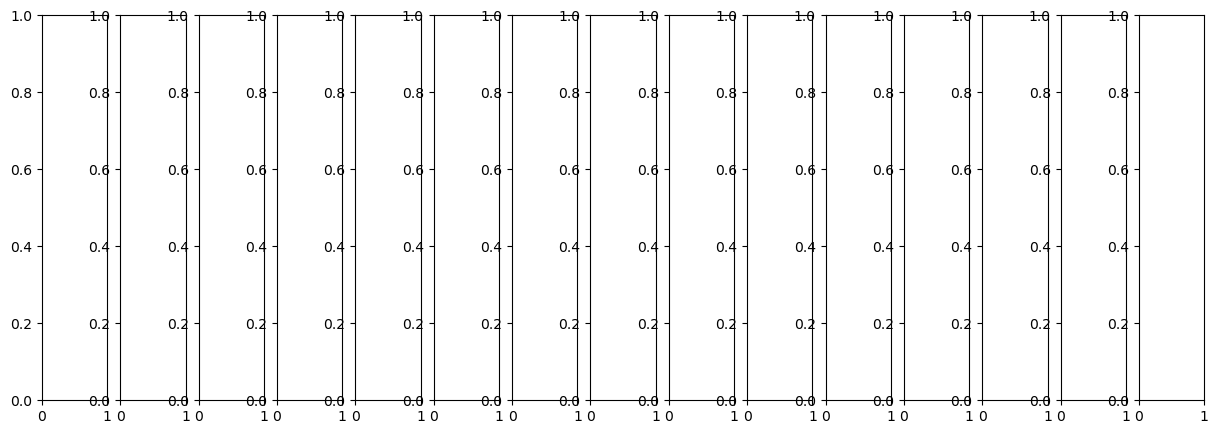

In [40]:
# Create subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=len(variable_names), figsize=(15,5))

# Create boxplot for each variable
for i, variable in enumerate(variable_names):
    sns.boxplot(x='cluster_kmeans', y=variable, data=df_2GMM, ax=axes[i])
    axes[i].set_title(variable)

# Customize plot
plt.suptitle('Box Plot of DataFrame Variables by Cluster')
plt.tight_layout()
plt.show()